Split Data

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
print(train.info())
print(test.info())

X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 324 entries, 0 to SalePrice
dtypes: float64(323), int64(1)
memory usage: 3.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 323 entries, 0 to 322
dtypes: float64(323)
memory usage: 3.6 MB
None


Train Model

In [25]:
# Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set (X_test)
y_val_pred = rf_regressor.predict(X_val)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_val_pred)
rmse = rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 742837496.11
Root Mean Squared Error: 27255.05


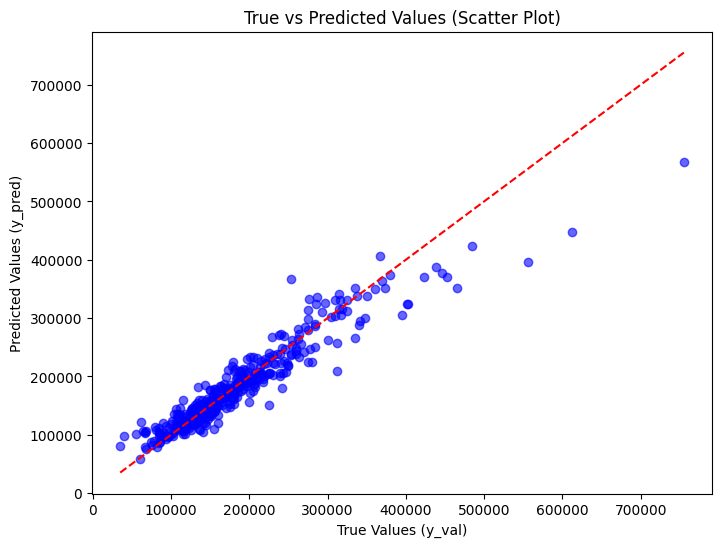

In [26]:
import matplotlib.pyplot as plt

# Assuming y_pred (predictions) and y_test (true values) are already defined

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, color='blue', alpha=0.6)  # Scatter plot of true vs predicted
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Ideal line
plt.xlabel('True Values (y_val)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('True vs Predicted Values (Scatter Plot)')
plt.show()

Create Submission File

In [27]:
print(X_train.info())
print(X_test.info())
y_test_pred = rf_regressor.predict(X_test)

submission_df = pd.DataFrame({"Id": list(range(1461, 2920)), "SalePrice": y_test_pred})
display(submission_df)
submission_df.to_csv('out/submission.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 135 to 1126
Columns: 323 entries, 0 to 322
dtypes: float64(323)
memory usage: 2.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 323 entries, 0 to 322
dtypes: float64(323)
memory usage: 3.6 MB
None


,Id,SalePrice
0,1461,126779.50
1,1462,159064.00
2,1463,186890.00
3,1464,186334.54
4,1465,205783.03
...,...,...
1454,2915,91021.50
1455,2916,88710.00
1456,2917,156403.00
1457,2918,116024.25
